In [1]:
from Core_lib import *

C:\ProgramData\Anaconda3\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"
mpl.rcParams.update({'figure.autolayout': True})

## Local density of states

Convergence took 21 iterations


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


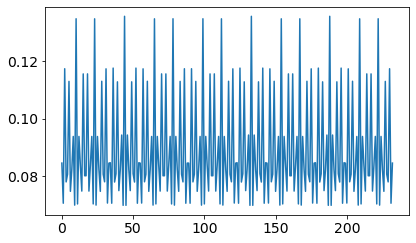

In [3]:
# Generates a Delta profile
n = 11
v = -1.5
phi = 0
beta = 'inf'
w = 0.1

chain = chainFC(n = n, phi = phi,v = v, u = -v/2, w = w,PBC = True, phase = 0)
Model = simple_ring(chain, beta = beta)

Model.iterate()
plt.plot(Model.Delta)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Order parameter, $\\Delta$')

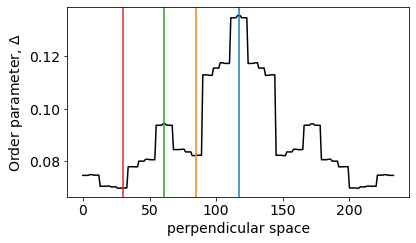

In [5]:
# Plots the Delta profile in perpendicular space
sequence = Fibonacci_sequence(n, phi)
ordering = sequence.get_ordering()
central_site = ordering[Model.NN//2+1]

fig, ax = plt.subplots()

ax.plot(Model.Delta[ordering], "k")
ax.axvline(Model.NN//2+1, color = "C0")
ax.axvline(85, color = "C1")
ax.axvline(61, color = "C2")
ax.axvline(30, color = "C3")

ax.set_xlabel("perpendicular space")
ax.set_ylabel("Order parameter, $\\Delta$")

Text(0, 0.5, 'Local density of states')

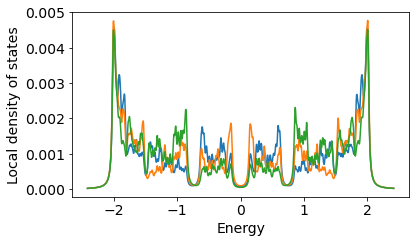

In [26]:
#Plot the Local density of states at particular sites

LDOSes, eex = Model.get_LDOS()

fig, ax = plt.subplots()

#ax.plot(eex, LDOSes[central_site])
ax.plot(eex, LDOSes[ordering[85]])
ax.plot(eex, LDOSes[ordering[61]])
ax.plot(eex, LDOSes[ordering[30]])

ax.set_xlabel("Energy")
ax.set_ylabel("Local density of states")

## What is the relationship between the local order parameter and the height of the coherence peak in the local density of states?

Can you take a look at this Chris? I think you should be able to use your previously written routine for figuring out the coherence peak heights

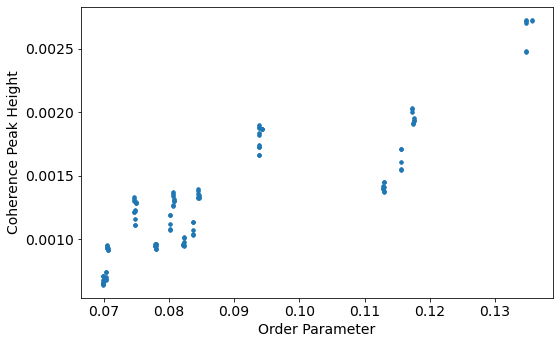

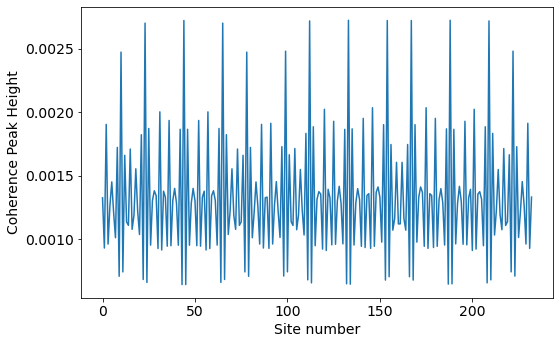

In [65]:
def get_peak_height(LDOSes, eex,side): # side is "left" or "right" for the coherence peak
    zeroindex = np.argmin(abs(eex))
    i = zeroindex
    if side=="right":
        while LDOSes[i-1]>LDOSes[i] or LDOSes[i+1]>LDOSes[i]:
            i += 1
        rightPeakIndex = i
        rightPeakHeight = LDOSes[rightPeakIndex]
        return rightPeakHeight
    elif side=="left":
        while LDOSes[i-1]>LDOSes[i] or LDOSes[i+1]>LDOSes[i]:
            i += -1
        leftPeakIndex = i
        leftPeakHeight = LDOSes[leftPeakIndex]
        return leftPeakHeight
    else:
        print("Second argument for get_peak_height() must be \"left\" or \"right\".")

coherence_peak_heights = []
for site in range(Model.NN):
    coherence_peak_height = get_peak_height(LDOSes[site],eex,"left")  # This is where your code goes
    coherence_peak_heights.append(coherence_peak_height)
plt.figure(figsize=(8,5))
plt.scatter([np.real(Model.Delta[site]) for site in range(Model.NN)],[coherence_peak_heights[site] for site in range(Model.NN)],s=10)
plt.xlabel("Order Parameter")
plt.ylabel("Coherence Peak Height")
plt.show()
# Need to take the real part of Deltas, looks like the imaginary parts were 0 anyways.
# for site in range(Model.NN):
#    print(np.real(Model.Delta[site]),Model.Delta[site])

plt.figure(figsize=(8,5))
plt.plot([site for site in range(Model.NN)],[coherence_peak_heights[site] for site in range(Model.NN)])
plt.xlabel("Site number")
plt.ylabel("Coherence Peak Height")
plt.show()